# Effect of GP firing rate on SNr response time

## Mapping input excitatory current to 1) firing rate of GPe and 2) total net inhibition to SNr

Simulations are performed with constant current injection for steady-state solution.

### 1) Firing rate of GPe is proportional to excitatory input current (above 30pA).

In [33]:
Igp_range = 10:10:100; % pA 
fr_gp=[];
for i = 1:length(Igp_range)

spk_gp=[];
Isnr_net=[];
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',Igp_range(i),'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

for l = 1:10
%Silent striatum, testing different constant excitatory input to GPe
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',Igp_range(i),'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
Isnr_net = [Isnr_net, meanIsnr]; %makes an array of average inhibition across trials
spk_gp = [spk_gp; Vm_gp==15]; %binary spike array
end

fr_gp(i) = sum(sum(spk_gp(:,end-1/dt:end)))/size(spk_gp,1); %average GPe firing rate during the last 1s in simulation - from 100 cells.

y(i) = mean(Isnr_net);
e(i) = std(Isnr_net);

end


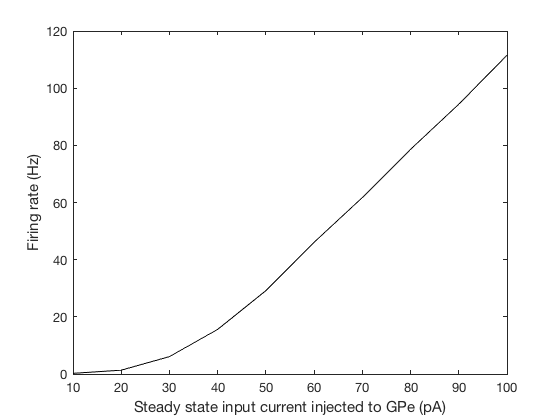

In [34]:
plot(Igp_range,fr_gp,'k')
xlabel('Steady state input current injected to GPe (pA)')
ylabel('Firing rate (Hz)')

### 2) Net inhibitory current to SNr is proportional to excitatory input current (above 30pA).

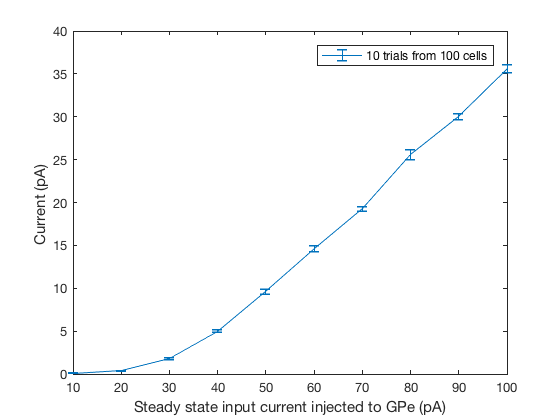

In [35]:
errorbar(Igp_range,y,e./sqrt(10)) % plotting mean and stanard error of the mean
legend('10 trials from 100 cells')
xlabel('Steady state input current injected to GPe (pA)')
ylabel('Current (pA) ')

Thus, injected current to GPe is proportional to firing rate of GPe as well as net inhibition to SNr

## Mapping the parameter space that control the net inhibitory current to SNr. 

1) Sweep across 10-100 pA of excitatory input to GPe -- to control firing rate. 

2) Also test synaptic transmission probabilities rainging from 0 to 1 in increment of 0.1. 

In [36]:
% excitatory input to GPe test range
gp_in = 10:10:100; %pA

% gp2snr synaptic transmission test range
P_gp2snr = 0:0.1:1;

fr_gp = zeros(length(gp_in),length(P_gp2snr));
I_tot_snr_mean = zeros(length(gp_in),length(P_gp2snr));
I_tot_snr_std = zeros(length(gp_in),length(P_gp2snr));
for param1 = 1:length(gp_in)
    for param2 = 1:length(P_gp2snr)
    
        spk_gp=[];
        Isnr_net=[];
        dt=0.0001; % 0.1ms integration steps

        %Runs 5s simulation without any stimulus to measure steady-state values. 
        [g_gp2snr] = BGdelayline_setinit2('I_exc_gp',gp_in(param1),'prob_syn_gp2snr',P_gp2snr(param2)); % initial conductance of gp to snr synapses 

        for l = 1:10
        %Silent striatum, testing different constant excitatory input to GPe and probability of transmission
        [Vm_gp,~,~,~, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',gp_in(param1),'prob_syn_gp2snr',P_gp2snr(param2),'g_gp2snr_i',g_gp2snr);

        meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
        Isnr_net = [Isnr_net, meanIsnr];
        spk_gp = [spk_gp; Vm_gp==15];
        end
        
        fr_gp(param1,param2) = sum(sum(spk_gp(:,end-1/dt:end)))/size(spk_gp,1);
        I_tot_snr_mean(param1,param2) = mean(Isnr_net);
        I_tot_snr_std(param1,param2) = std(Isnr_net);
     end
    
end


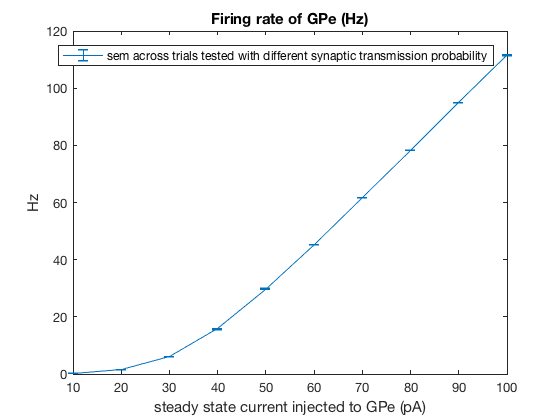

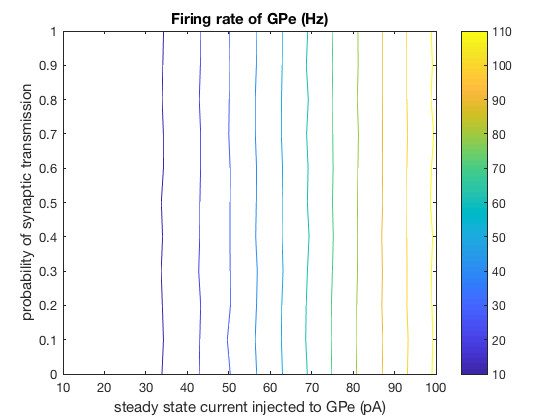

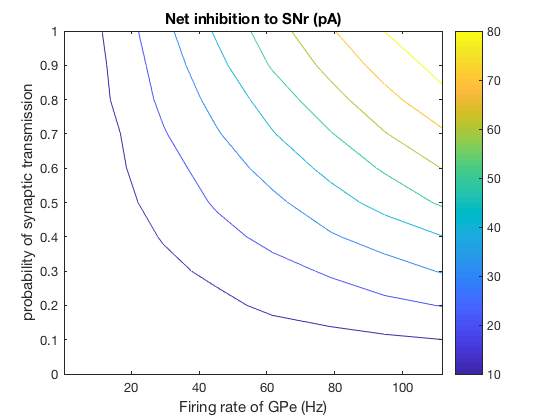

In [37]:
%figure;surfc(fr_gp(:,1),P_gp2snr,I_tot_snr_mean')
figure;contour(fr_gp(:,1),P_gp2snr,I_tot_snr_mean');colorbar
title('Net inhibition to SNr (pA)')
xlabel('Firing rate of GPe (Hz)')
ylabel('probability of synaptic transmission')

figure;contour(gp_in,P_gp2snr,fr_gp');colorbar
title('Firing rate of GPe (Hz)')
xlabel('steady state current injected to GPe (pA)')
ylabel('probability of synaptic transmission')

figure;errorbar(gp_in,mean(fr_gp,2),std(fr_gp,0,2)/sqrt(length(P_gp2snr)));
title('Firing rate of GPe (Hz)')
legend('sem across trials tested with different synaptic transmission probability')
xlabel('steady state current injected to GPe (pA)')
ylabel('Hz')


The plot reveals isoclines of net inhibitory current to SNr. The lines indicate combination of firing rate of GPe and probability of synaptic transmission that correspond to the same amount of GABAergic current. 

Next, I will look at how total net inhibition affects SNr firing depending on the net excitation. Total net inhibition is controlled by firing rate of GPe and release probability from GPe to SNr.


## Mapping net inhibitory current to SNr firing

I predict that increasing inhibitory current will linearly decrease SNr firing.

In [38]:
Isnr_inh = 10:10:100; % pA, inhibitory
Isnr_exc = 50:10:100;   % pA, excitatory
fr_snr = zeros(length(Isnr_inh),length(Isnr_exc));

for m = 1:length(Isnr_exc)
for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

for l = 1:10
%%Simulation
Vm_snr = BGdelayline_Isnr2snrfr('Iexc_snr',Isnr_exc(m),'Igaba_snr',Isnr_inh(i));
spk_snr = [spk_snr; Vm_snr==15];
end

fr_snr(i,m) = sum(sum(spk_snr(:,end-1/dt:end)))/size(spk_snr,1); %average GPe firing rate during the last 1s in simulation - from 100 cells.

end
end



ans =

  -16.3060
  -16.5630
  -16.6400
  -15.6740
  -13.6650
   -9.7670
   -4.8030
   -1.2210
   -0.1940


ans =

   13.8660   15.6130   16.4190   16.5910   16.4040



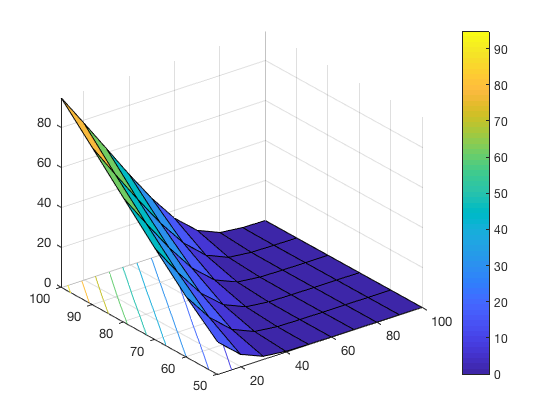

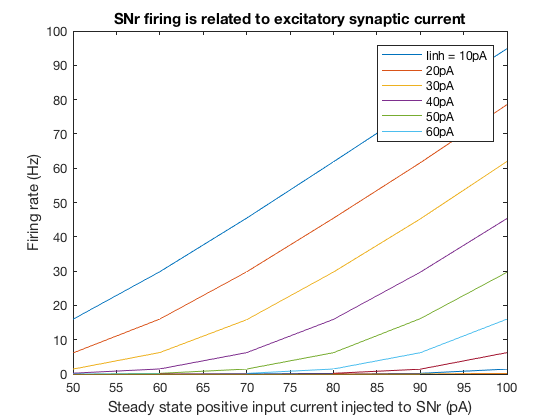

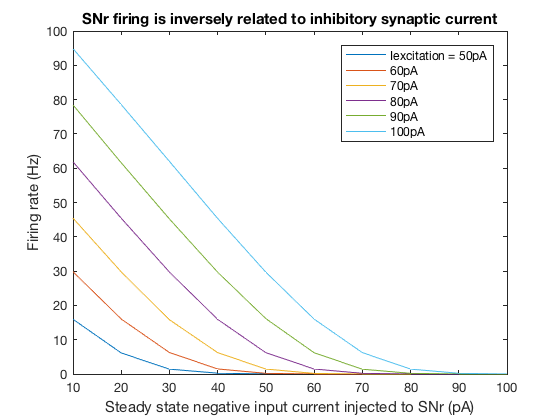

In [60]:
plot(Isnr_inh,fr_snr)
legend('Iexcitation = 50pA','60pA','70pA','80pA','90pA','100pA')
xlabel('Steady state negative input current injected to SNr (pA)')
ylabel('Firing rate (Hz)')
title('SNr firing is inversely related to inhibitory synaptic current' )
diff(fr_snr(:,6))

figure
plot(Isnr_exc,fr_snr')
legend('Iinh = 10pA','20pA','30pA','40pA','50pA','60pA')
xlabel('Steady state positive input current injected to SNr (pA)')
ylabel('Firing rate (Hz)')
title('SNr firing is related to excitatory synaptic current' )
diff(fr_snr(1,:))

figure
surfc(Isnr_inh,Isnr_exc,fr_snr');colorbar


The plot reveals that minimal current required for repetitive firing is ~10pA (Iinh + Iexc). 

## How does net inhibition affect SNr response time?

I apply constant excitation (100pA) and inhibition (varying, 10pA to 100pA) until stimulus time t = 1s, at which I will remove inhibition (Iinh = 0pA) for 10ms. I will determine whether SNr response time differs. 

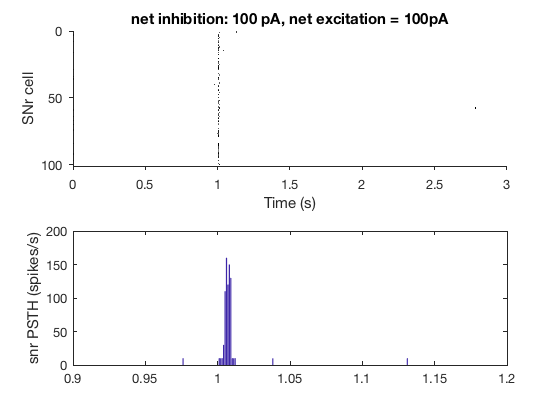

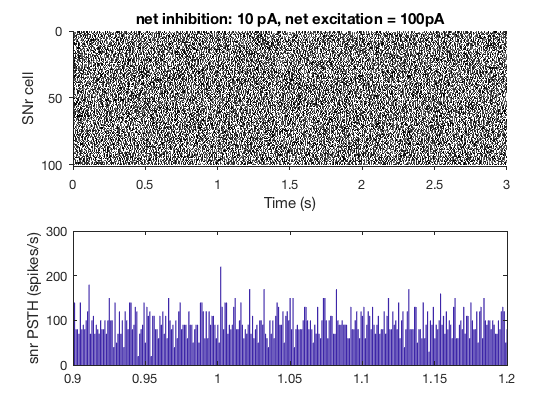

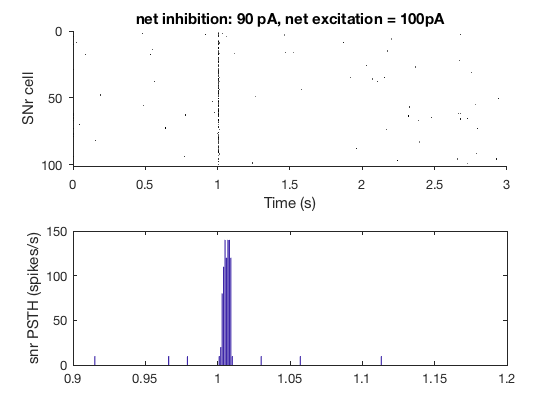

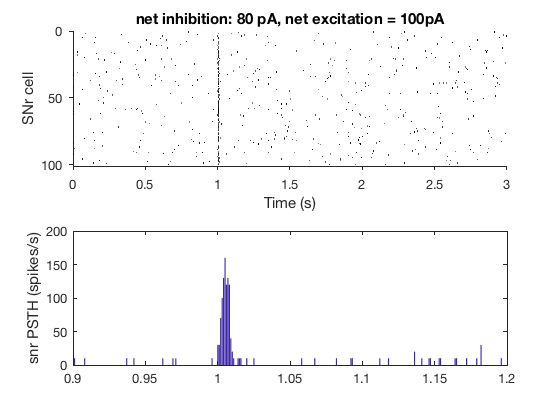

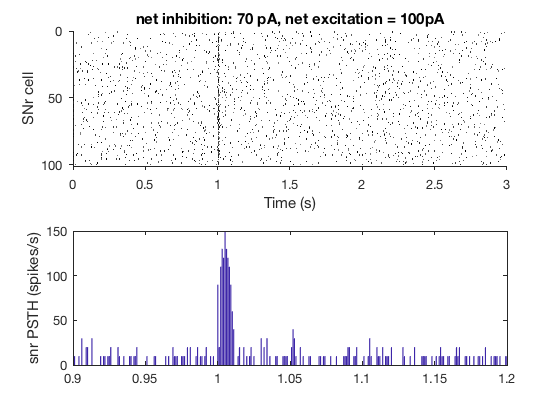

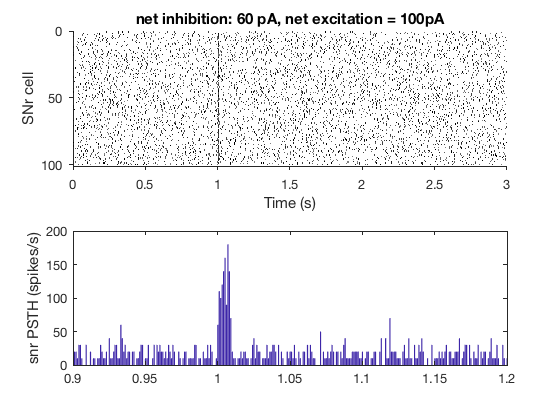

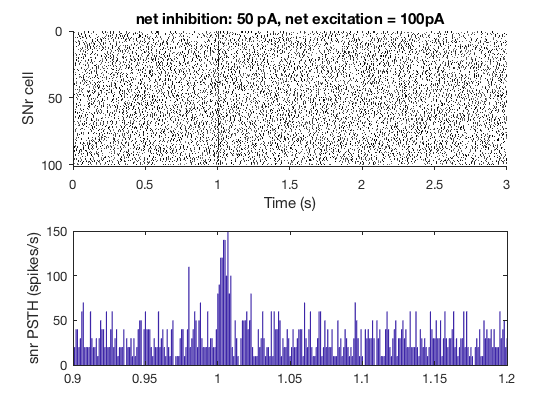

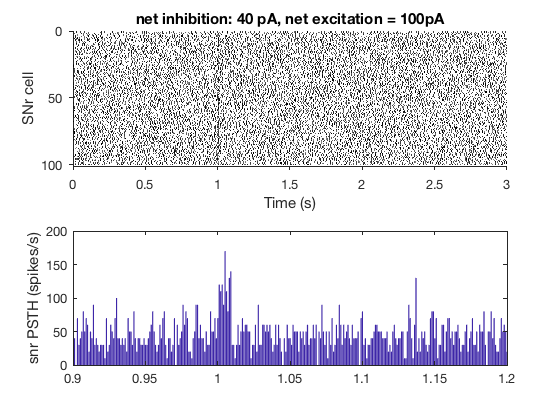

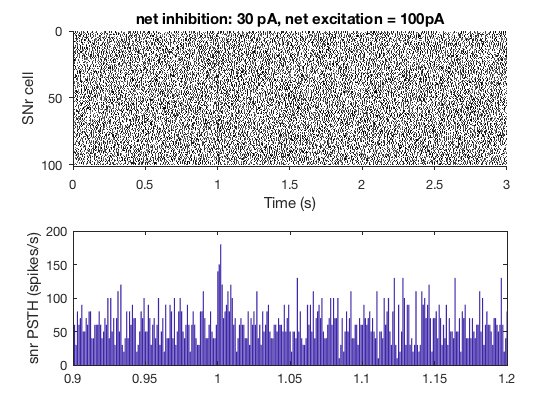

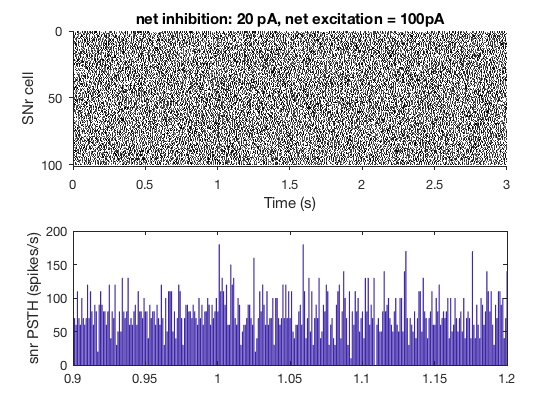

In [42]:
Isnr_inh = 10:10:100; % pA, inhibitory
%fr_snr = zeros(length(Isnr_inh),length(Isnr_exc));

for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

Vm_snr = BGdelayline_SNrdelay('Iexc_snr',100,'Igaba_snr',Isnr_inh(i)); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];

binWidth_snr = 10; %ms

t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_i = 1:length(t_bar_snr)-1

    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar_snr(psth_i):(t_bar_snr(psth_i)+binWidth_snr-1))));

end
figure(i)
subplot(2,1,1)
plotRaster(spk_snr);
ylabel('SNr cell')
title(sprintf('net inhibition: %d pA, net excitation = 100pA',Isnr_inh(i)))
subplot(2,1,2)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0.9 1.2])
ylabel('snr PSTH (spikes/s)')
end


The peristimulus time histogram (PSTH) from 100 SNr neurons at various net inhibition (which changes SNr basal firing rates) reveal that SNr response time is inversely related to GPe firing rate. 

### Response time of SNr at various excitatory input currents.

I plotted the latency of maximum instantaneous firing rate across varying inhibitory and excitatory input currents to SNr. 

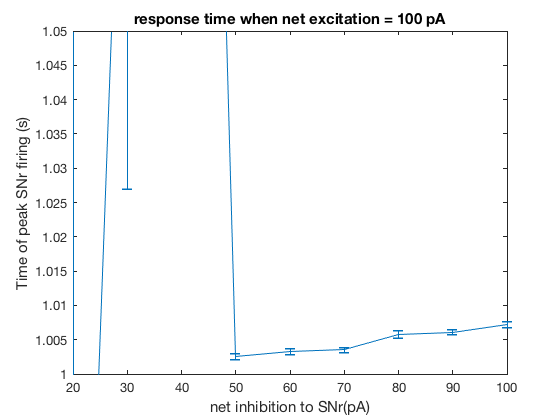

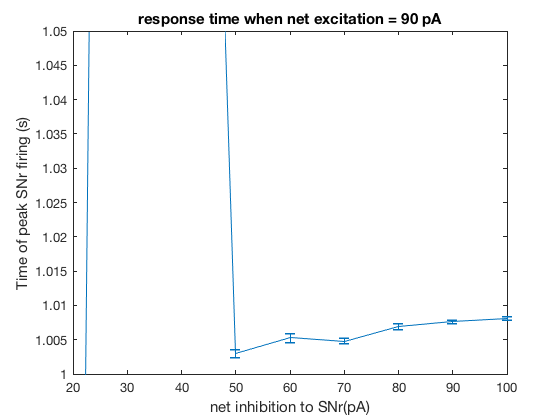

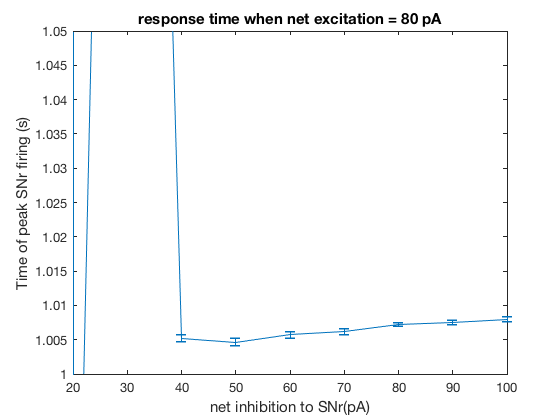

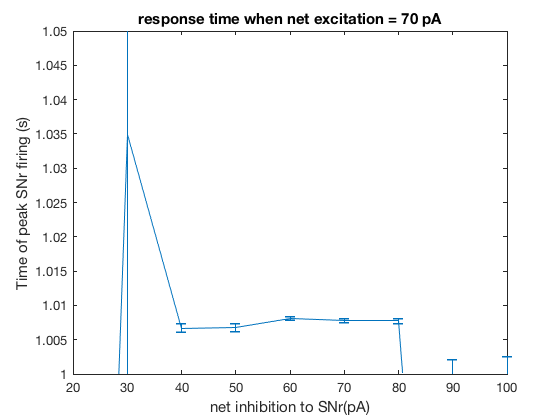

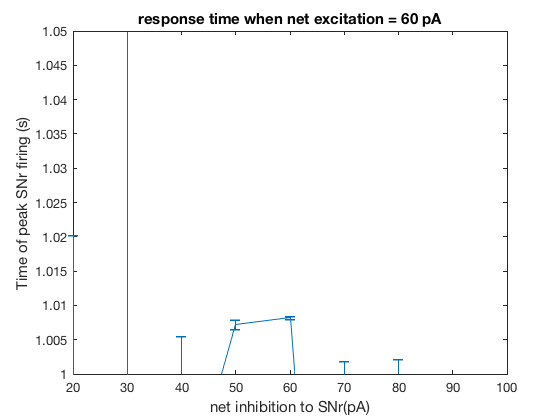

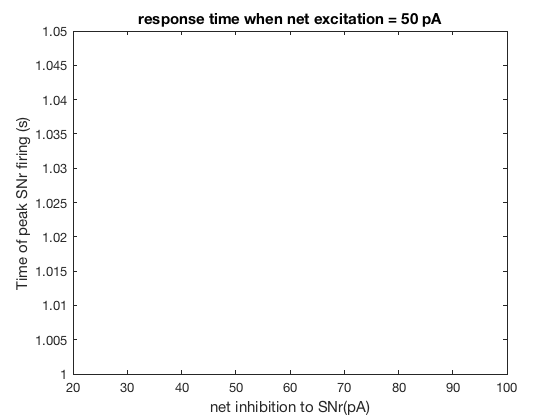

In [41]:
Isnr_inh = 10:10:100; % pA, inhibitory
Isnr_exc = 50:10:100;   % pA, excitatory

for m = 1:length(Isnr_exc)
tdelay = zeros(10,length(Isnr_inh));

for sim_i = 1:10 % number of simulations
for i = 1:length(Isnr_inh)

spk_snr=[];
dt=0.0001; % 0.1ms integration steps

Vm_snr = BGdelayline_SNrdelay('Iexc_snr',Isnr_exc(m),'Igaba_snr',Isnr_inh(i)); % only SNr layer. 100 neurons
spk_snr = [spk_snr; Vm_snr==15];

% Peristimulus time histogram 
binWidth_snr = 5; %ms, bin size
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_i = 1:length(t_bar_snr)-1
    psth_snr(psth_i) = sum(sum(spk_snr(:,t_bar_snr(psth_i):(t_bar_snr(psth_i)+binWidth_snr-1))));
end

%% z-score
%mean_fr = mean(psth_snr(2:1/dt/binWidth_snr)/(size(spk_snr,1)*(binWidth_snr*0.0001))); % mean before stim
%std_fr = std(psth_snr(2:1/dt/binWidth_snr)/(size(spk_snr,1)*(binWidth_snr*0.0001)));  % std before stim
%z_snr{sim_i,i} = (psth_snr((1/dt/binWidth_snr-1000):end)/(size(spk_snr,1)*(binWidth_snr*0.0001))-mean_fr)/std_fr ; % z-score

[M,I]=max(psth_snr(2:end));
tdelay(sim_i,i) = t_bar_snr(I)*dt;

end
end

figure(m)
errorbar(Isnr_inh(2:end),mean(tdelay(:,2:end),1),std(tdelay(:,2:end),1)/sqrt(size(tdelay,1)))
xlabel('net inhibition to SNr(pA)')
ylabel('Time of peak SNr firing (s)' )
ylim([1 1.05])
title(sprintf('response time when net excitation = %d pA',Isnr_exc(m)))

end

This plot reveals that, when SNr can be disinhibited, net inhibitory input current is related to the response time of SNr. There is an increasing trend, but the effect seems small. 
The response time ranges between 5ms and 8ms. 

## Next steps

1) Plot response time vs. net inhibition to SNr (while total current is fixed at a constant value) -> expect that response time does not differ because basal firing rate will be the same. 

2) Analyze the how SNr response changes depending on dI/dt (inhibitory current). I hypothesize that firing rate of GPe determines the dI/dt, which affects excitability of neurons.
